<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

WHO = 7
SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

13:33:03 INFO << load arm CSV.
13:33:03 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, 7, 1, pf_order)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [00:43<00:00, 14.43s/it]


In [6]:
# pf.plot_global_event()

In [7]:
for i in range(len(pfs)):
    print(pfs[i].primitive_df)

     hand_side       AAI           AVI      ASMA         GAI        GVI  \
0         left  0.337924  2.369709e-05  0.567000   13.844102   0.008371   
1        right  0.182380  1.020610e-04  0.306667  345.820356   6.518311   
2         left  0.359329  7.733747e-07  0.604000   11.557181   0.044843   
3        right  0.222031  1.158585e-05  0.334500  339.084437  10.039850   
4         left  0.353843  3.472095e-07  0.590000   14.703764   3.050871   
5        right  0.281050  0.000000e+00  0.477000  319.681394   0.000000   
6         left  0.325767  8.594093e-05  0.538000   20.979637   1.690784   
7        right  0.290235  8.739277e-06  0.482000  302.535141  39.306154   
8         left  0.302439  5.574074e-05  0.492000   22.791887   1.355889   
9        right  0.323997  1.025405e-05  0.552000  279.527974  53.286715   
10        left  0.278878  0.000000e+00  0.451000   16.328792   0.000000   
11       right  0.288107  2.177126e-03  0.430000  257.478691  23.097861   
12        left  0.266627 

In [8]:
model = Model(k_centroid=50)
model.fit(pfs[TRAIN_ORDER - 1])

100%|██████████| 361/361 [01:00<00:00,  5.99it/s]


In [9]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 5, 6], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

predicting 1 performance


100%|██████████| 361/361 [01:00<00:00,  5.99it/s]
13:36:10 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
13:36:10 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


============ prediction arm ============
Normalized confusion matrix
[[0.87916667 0.05208333 0.01041667 0.00208333 0.05625    0.        ]
 [0.9025974  0.04545455 0.01298701 0.         0.03896104 0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.5        0.0625     0.0625     0.         0.375      0.        ]
 [0.12       0.         0.02       0.         0.8        0.06      ]
 [0.2        0.         0.         0.         0.5        0.3       ]]


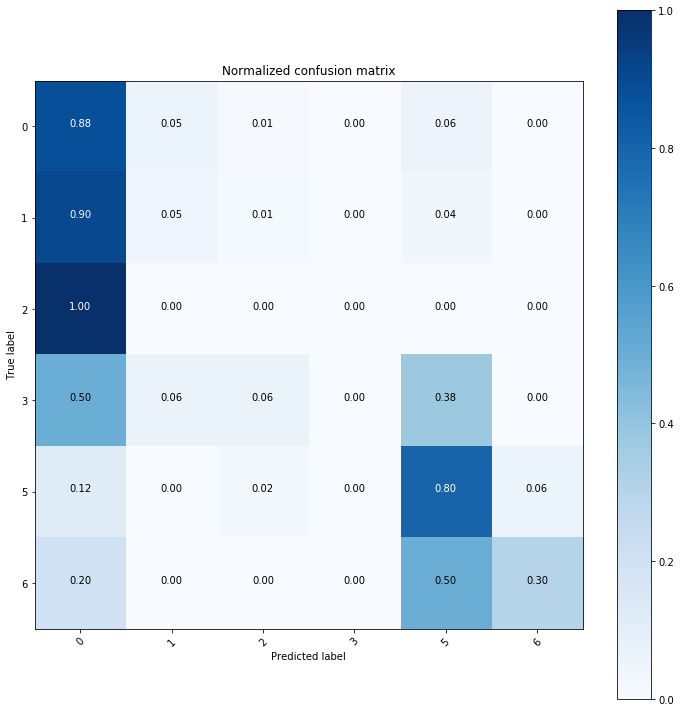

predicting 2 performance


100%|██████████| 361/361 [00:59<00:00,  6.03it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.78333333 0.10625    0.00625    0.00416667 0.1        0.        ]
 [0.7987013  0.11038961 0.00649351 0.         0.08441558 0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.6875     0.0625     0.         0.         0.25       0.        ]
 [0.08       0.         0.         0.         0.92       0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]]


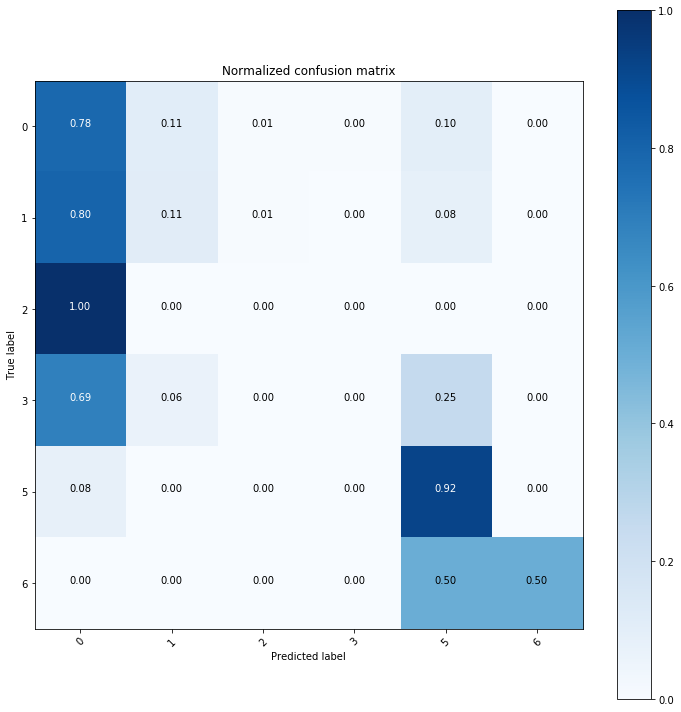

predicting 3 performance


100%|██████████| 361/361 [01:00<00:00,  6.00it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.14935065 0.85064935 0.         0.         0.         0.        ]
 [0.16666667 0.         0.83333333 0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


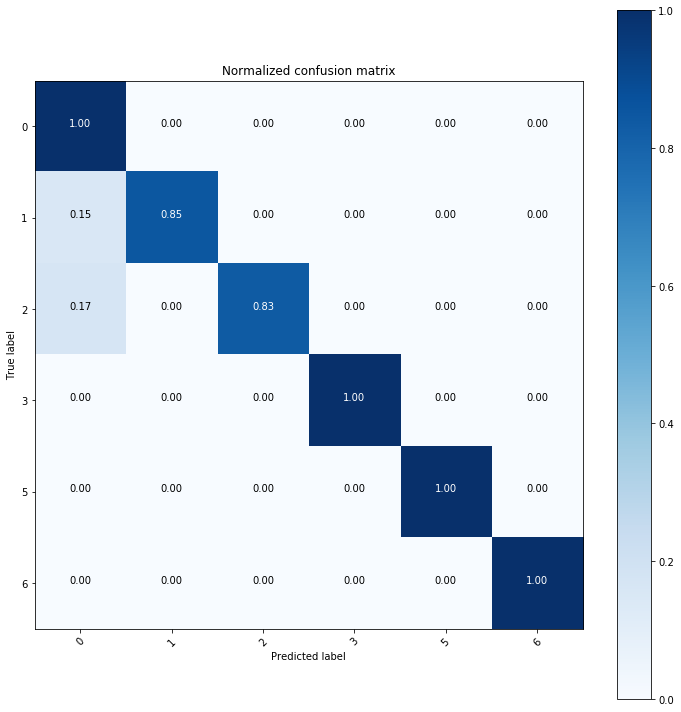

In [10]:
for od in range(len(pfs)):
    print('predicting %d performance' % (od + 1))
    pred_y, y = model.predict(pfs[od])
    
    print('============ prediction arm ============')
    cutstom_output_cnf_matrix(y, pred_y)